In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Load Data
df = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\New folder\data.csv', sep=';')

In [4]:
# Clean column names (remove trailing tabs if any)
df.columns = df.columns.str.replace('\t', '')
print(df.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0     

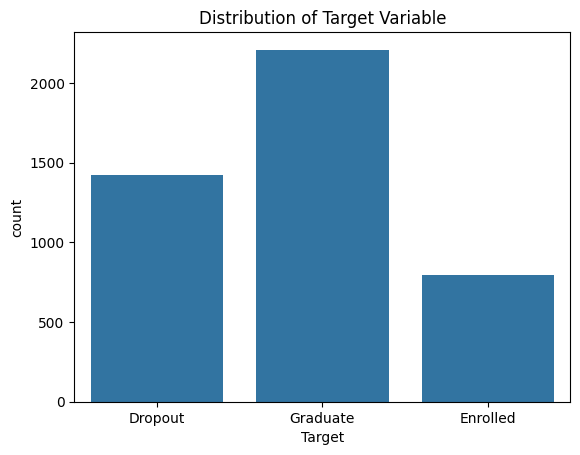

In [5]:
# Check Target Distribution
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [6]:
# Feature Importance Analysis
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7604519774011299
              precision    recall  f1-score   support

     Dropout       0.85      0.77      0.81       316
    Enrolled       0.49      0.30      0.37       151
    Graduate       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.76      0.74       885



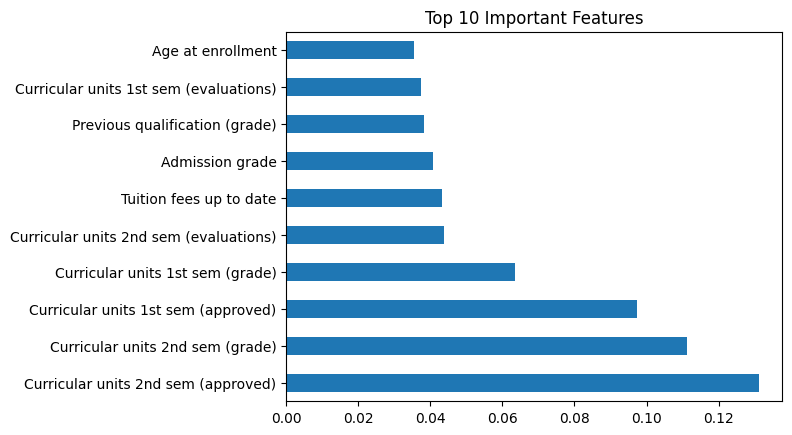

In [7]:
# Plot Feature Importance
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()